In [1]:
#!pip install tensorflow==1.15.0
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 47.9MB/s 
     |████████████████████████████████| 3.8MB 44.0MB/s 
     |████████████████████████████████| 450kB 50.8MB/s 
     |████████████████████████████████| 81kB 12.5MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstal

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/KrylovS/sign-language-translation/master/content/sign_mnist_train.csv \
    -O /content/sign_mnist_train.csv

!wget --no-check-certificate \
    https://raw.githubusercontent.com/KrylovS/sign-language-translation/master/content/sign_mnist_test.csv \
    -O /content/sign_mnist_test.csv

--2019-11-14 11:02:16--  https://raw.githubusercontent.com/KrylovS/sign-language-translation/master/content/sign_mnist_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83253609 (79M) [text/plain]
Saving to: ‘/content/sign_mnist_train.csv’

/content/sign_mnist 100%[===================>]  79.40M   271MB/s    in 0.3s    

2019-11-14 11:02:19 (271 MB/s) - ‘/content/sign_mnist_train.csv’ saved [83253609/83253609]

--2019-11-14 11:02:21--  https://raw.githubusercontent.com/KrylovS/sign-language-translation/master/content/sign_mnist_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTT

In [0]:
train_df = pd.read_csv('/content/sign_mnist_train.csv')
test_df = pd.read_csv('/content/sign_mnist_test.csv')

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [0]:
labels = train_df['label'].to_numpy()

In [0]:
labels_list = np.unique(labels).tolist()

In [0]:
labels_to_chars = {i : chr(ord('a') + i) for i in labels_list}

In [0]:
train = train_df.drop('label', axis=1).to_numpy()

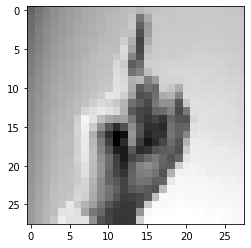

In [62]:
plt.imshow(train[0].reshape(28,28))

In [0]:
def plot_images(original_img, labels, images_count, labels_to_chars):
  plt.figure(figsize=(20, 5))
  for i in range(images_count): 
      ax = plt.subplot(1, images_count, i + 1)
      ax.title.set_text(labels_to_chars[labels[i]])
      plt.imshow(original_img[i].reshape(28, 28))
      plt.gray()
      plt.axis('off')
  plt.show()
  

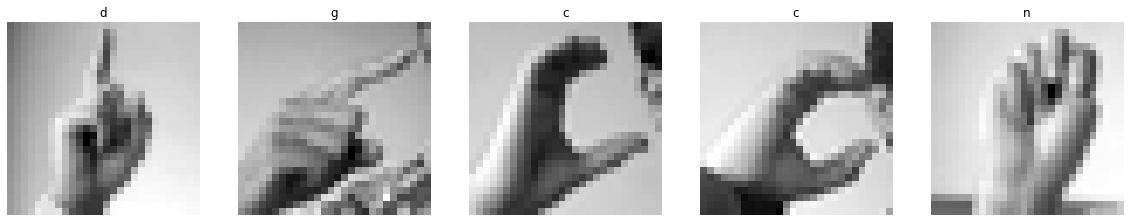

In [64]:
plot_images(train, labels, 5, labels_to_chars)

In [0]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels_enc = label_binrizer.fit_transform(labels)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train, labels_enc, 
                                                    test_size = 0.1, random_state = 13)

In [14]:
y_train.shape

(19218, 24)

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) / 255
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1) / 255

In [69]:
x_train.shape

(24709, 28, 28, 1)

In [0]:
import tensorflow as tf

In [19]:
tf.__version__

'2.0.0'

In [0]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Reshape
from tensorflow.keras import Model

In [0]:
model = tf.keras.models.load_model("/content/simplemodel2.h5")

In [0]:
model1 = tf.keras.models.Sequential([
                                    #Reshape((28, 28, 1), input_shape=(784,)),
                                    Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),
                                    MaxPooling2D(2, 2),

                                    Conv2D(64, (3,3), activation = 'relu'),
                                    MaxPooling2D(2, 2),

                                    Conv2D(128, (3,3), activation = 'relu'),
                                    MaxPooling2D(2, 2),

                                    Flatten(),
                                    Dense(128, activation = 'relu'),
                                    Dropout(0.2),
                                    Dense(24, activation = 'softmax')
])

In [0]:
model2 = tf.keras.models.Sequential([
                                    #Reshape((28, 28, 1), input_shape=(784,)),
                                    Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1), padding = "same"),
                                    Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1), padding = "same"),
                                    MaxPooling2D(2, 2),

                                    Conv2D(64, (3,3), activation = 'relu', padding = "same"),
                                    Conv2D(64, (3,3), activation = 'relu', padding = "same"),
                                    Dropout(0.2),
                                    MaxPooling2D(2, 2),

                                    Conv2D(128, (3,3), activation = 'relu', padding = "same"),
                                    Dropout(0.2), 
                                    MaxPooling2D(2, 2),
                                     
                                    #Conv2D(128, (3,3), activation = 'relu', padding = "same"),
                                    #Dropout(0.2), 
                                    #MaxPooling2D(2, 2),

                                    Flatten(),
                                    Dense(128, activation = 'relu'),
                                    Dropout(0.4),
                                    Dense(24, activation = 'softmax')
])

In [87]:
#model = model1
#model1.summary()
model = model2
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 64)         

In [0]:
class userCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') > 0.9995):
      print("\n Reached accuracy. Stop trainning!")
      self.model.stop_training = True

In [0]:
callback = userCallback()
batch_size = 256
epochs = 10

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [92]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

datagen.fit(x_train)
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val, y_val),
                              callbacks = [callback])#, 
                              #steps_per_epoch = x_train.shape[0] // batch_size)

Epoch 1/10
97/97 [==============================] - 129s 1s/step - loss: 2.6940 - accuracy: 0.1806 - val_loss: 1.5697 - val_accuracy: 0.6351
Epoch 2/10
97/97 [==============================] - 125s 1s/step - loss: 1.3552 - accuracy: 0.5569 - val_loss: 0.5098 - val_accuracy: 0.8984
Epoch 3/10
97/97 [==============================] - 120s 1s/step - loss: 0.7432 - accuracy: 0.7443 - val_loss: 0.2434 - val_accuracy: 0.9559
Epoch 4/10
97/97 [==============================] - 117s 1s/step - loss: 0.4906 - accuracy: 0.8282 - val_loss: 0.1308 - val_accuracy: 0.9851
Epoch 5/10
97/97 [==============================] - 120s 1s/step - loss: 0.3443 - accuracy: 0.8826 - val_loss: 0.0765 - val_accuracy: 0.9883
Epoch 6/10
97/97 [==============================] - 125s 1s/step - loss: 0.2637 - accuracy: 0.9101 - val_loss: 0.0416 - val_accuracy: 0.9956
Epoch 7/10
97/97 [==============================] - 128s 1s/step - loss: 0.2075 - accuracy: 0.9309 - val_loss: 0.0238 - val_accuracy: 0.9993
Epoch 8/10
97

In [0]:
history = model.fit(x_train, y_train, epochs = epochs, validation_data = (x_val, y_val),
                    callbacks = [callback], batch_size = batch_size)

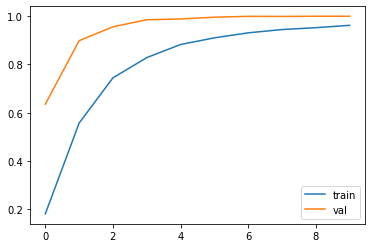

In [93]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(len(acc_train))

plt.plot(epochs, acc_train)
plt.plot(epochs, acc_val)
plt.legend(['train','val'])
plt.show()

In [0]:
from sklearn.metrics import accuracy_score, f1_score

In [0]:
labels_test = test_df['label'].to_numpy()
x_test = test_df.drop('label', axis = 1).to_numpy()
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) / 255

In [0]:
label_binrizer = LabelBinarizer()
labels_test_enc = label_binrizer.fit_transform(labels_test)

In [0]:
pred = model.predict(x_test)

In [97]:
accuracy_score(labels_test_enc, pred.round())

0.9993028443948689

In [99]:
f1_score(labels_test_enc, pred.round(),average = 'weighted')

0.9994410100353522

In [0]:
model.save("goodmodel.h5")